In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [58]:
# Cargamos los datos a usar
products = pd.read_csv("datasets/olist_products_dataset.csv")
orders = pd.read_csv('datasets/olist_orders_dataset.csv')
items = pd.read_csv('datasets/olist_order_items_dataset.csv')
reviews = pd.read_csv('datasets/olist_order_reviews_dataset.csv')

In [59]:
# CREAMOS UNA SERIE DE PROMERIO DE PUNTUAJE EN FUNCION AL ORDER_ID
promedio_reviews = reviews.groupby('order_id')['review_score'].mean().reset_index()
# SE RENOMBRA LA COLUMNA A MEAN_REVIEW_SCORE
promedio_reviews.rename(columns={'review_score': 'mean_review_score'}, inplace=True)
# UNIMOS REVIEWS CON PROMEDIO_REVIEWS
items_review = items.merge(promedio_reviews, on='order_id', how= 'left')


In [60]:
items_review.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,mean_review_score
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,5.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,4.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,5.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,4.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,5.0


In [61]:
# PROMEDIO POR PRODUCT_ID
product_summary = items_review.groupby('product_id').agg({
    'price' : 'mean',
    'mean_review_score' : 'mean'
}).reset_index()

In [62]:
product_summary = product_summary.merge(products[['product_id','product_category_name']], on='product_id', how='left')

In [63]:
product_summary.head(5)

,product_id,price,mean_review_score,product_category_name
0,00066f42aeeb9f3007548bb9d3f33c38,101.65,5.0,perfumaria
1,00088930e925c41fd95ebfe695fd2655,129.90,4.0,automotivo
2,0009406fd7479715e4bef61dd91f2462,229.00,1.0,cama_mesa_banho
3,000b8f95fcb9e0096488278317764d19,58.90,5.0,utilidades_domesticas
4,000d9be29b5207b54e86aa1b1ac54872,199.00,5.0,relogios_presentes


In [64]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

product_summary['category_encoded'] = le.fit_transform(product_summary['product_category_name'])

In [65]:
product_summary.head(5)

,product_id,price,mean_review_score,product_category_name,category_encoded
0,00066f42aeeb9f3007548bb9d3f33c38,101.65,5.0,perfumaria,62
1,00088930e925c41fd95ebfe695fd2655,129.90,4.0,automotivo,8
2,0009406fd7479715e4bef61dd91f2462,229.00,1.0,cama_mesa_banho,13
3,000b8f95fcb9e0096488278317764d19,58.90,5.0,utilidades_domesticas,72
4,000d9be29b5207b54e86aa1b1ac54872,199.00,5.0,relogios_presentes,66


In [66]:
product_summary[product_summary['product_category_name']== 'perfumaria']

,product_id,price,mean_review_score,product_category_name,category_encoded
0,00066f42aeeb9f3007548bb9d3f33c38,101.650000,5.000000,perfumaria,62
38,005030ef108f58b46b78116f754d8d38,14.759231,4.615385,perfumaria,62
66,009c09f439988bc06a93d6b8186dce73,132.400000,5.000000,perfumaria,62
78,00baba5b58e274d0332a0c8a0a66f877,47.900000,4.166667,perfumaria,62
83,00c3e35b00dd00ab864d4a94c1b97e66,99.990000,5.000000,perfumaria,62
...,...,...,...,...,...
32689,fe0be6df56c891975ff729be49fd2e17,44.900000,4.000000,perfumaria,62
32833,ff4580bbb95dbae914ec0a9b76b0a5c4,129.900000,2.000000,perfumaria,62
32838,ff4f41437ea37fc126d110853404b625,8.900000,5.000000,perfumaria,62
32860,ff7ac89ca5b77d0fb5f8a65262d73956,97.990000,3.000000,perfumaria,62


In [67]:
product_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   product_id             32951 non-null  object 
 1   price                  32951 non-null  float64
 2   mean_review_score      32789 non-null  float64
 3   product_category_name  32341 non-null  object 
 4   category_encoded       32951 non-null  int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 1.3+ MB


In [68]:
product_summary[['price','mean_review_score','category_encoded']].isna().sum()

price                  0
mean_review_score    162
category_encoded       0
dtype: int64

In [69]:
product_summary = product_summary.dropna(subset=['mean_review_score'])

In [70]:
product_summary[['price','mean_review_score','category_encoded']].isna().sum()

price                0
mean_review_score    0
category_encoded     0
dtype: int64

In [71]:
X = product_summary[['price','mean_review_score','category_encoded']]


In [72]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler



scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters= 5, random_state= 42)
product_summary['cluster'] = kmeans.fit_predict(X_scaled)

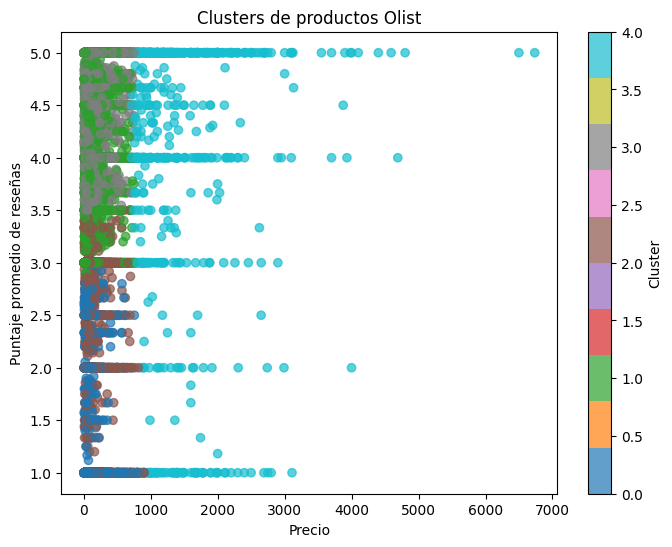

In [73]:


plt.figure(figsize=(8,6))
plt.scatter(
    product_summary['price'],
    product_summary['mean_review_score'],
    c=product_summary['cluster'],
    cmap='tab10',
    alpha=0.7
)

plt.xlabel('Precio')
plt.ylabel('Puntaje promedio de reseñas')
plt.title('Clusters de productos Olist')
plt.colorbar(label='Cluster')
plt.show()



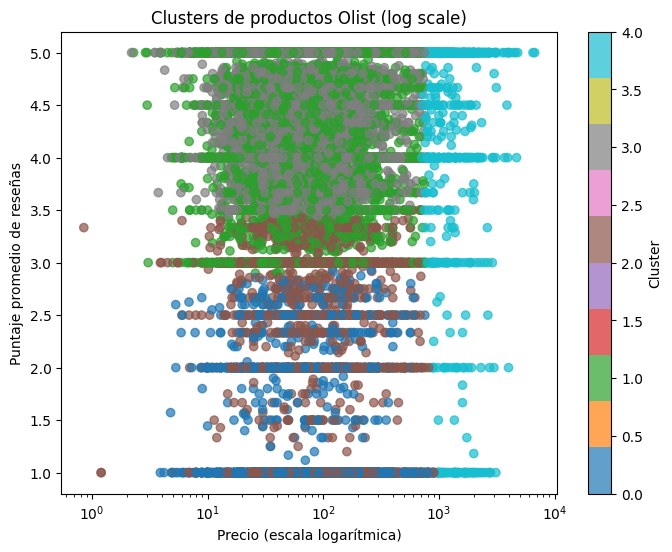

In [74]:
plt.figure(figsize=(8,6))
plt.scatter(
    product_summary['price'],
    product_summary['mean_review_score'],
    c=product_summary['cluster'],
    cmap='tab10',
    alpha=0.7
)
plt.xscale('log')
plt.xlabel('Precio (escala logarítmica)')
plt.ylabel('Puntaje promedio de reseñas')
plt.title('Clusters de productos Olist (log scale)')
plt.colorbar(label='Cluster')
plt.show()


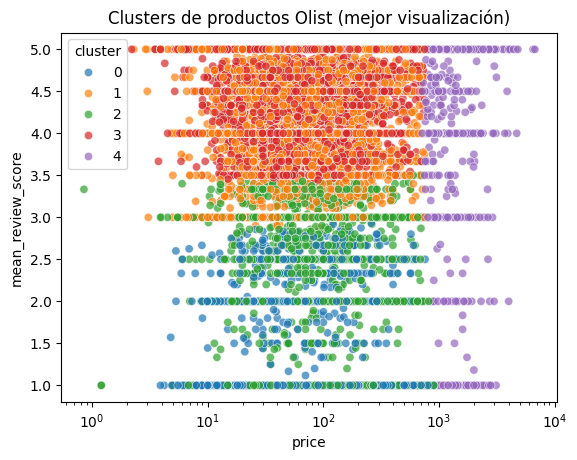

In [75]:
import seaborn as sns

sns.scatterplot(
    data=product_summary,
    x='price', y='mean_review_score',
    hue='cluster', palette='tab10', alpha=0.7
)
plt.xscale('log')
plt.title('Clusters de productos Olist (mejor visualización)')
plt.show()


In [76]:
cluster_info = product_summary.groupby('cluster')[['price','mean_review_score']].mean().round(2)
cluster_info['count'] = product_summary['cluster'].value_counts()
cluster_info


,price,mean_review_score,count
cluster,,,
0,125.27,1.38,2335
1,114.36,4.47,12363
2,125.66,2.28,3834
3,114.05,4.62,13479
4,1329.38,4.16,778


In [77]:
product_summary.groupby('cluster')['product_category_name'].value_counts().groupby('cluster').head(3)


cluster  product_category_name 
0        moveis_decoracao           454
         utilidades_domesticas      308
         informatica_acessorios     223
1        moveis_decoracao          2171
         utilidades_domesticas     1998
         informatica_acessorios    1225
2        cama_mesa_banho            883
         beleza_saude               454
         automotivo                 431
3        esporte_lazer             2233
         cama_mesa_banho           2112
         beleza_saude              1919
4        relogios_presentes         143
         beleza_saude                62
         esporte_lazer               51
Name: count, dtype: int64

/var/folders/z0/w5_50df55xb9kdf1xldm_zxh0000gn/T/ipykernel_1743/3356348982.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=product_summary, x='cluster', y='mean_review_score', palette='tab10')


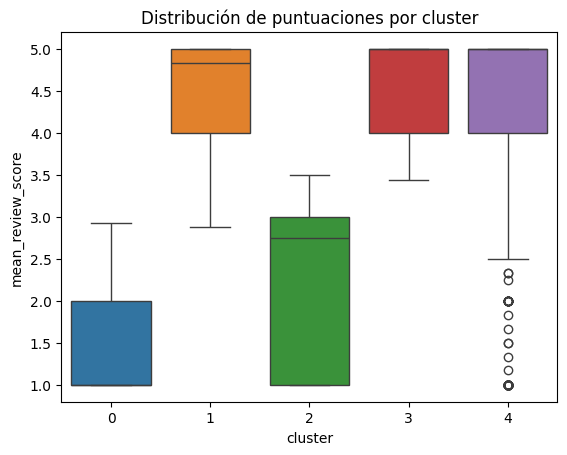

In [78]:

sns.boxplot(data=product_summary, x='cluster', y='mean_review_score', palette='tab10')
plt.title('Distribución de puntuaciones por cluster')
plt.show()


In [79]:
nombres_clusters = {
    0: 'Económicos con malas reseñas',
    1: 'Económicos bien valorados',
    2: 'Económicos con reseñas mixtas',
    3: 'Económicos con excelente valoración',
    4: 'Premium con buenas reseñas'
}

product_summary['cluster_label'] = product_summary['cluster'].map(nombres_clusters)

In [80]:
product_summary

,product_id,price,mean_review_score,product_category_name,category_encoded,cluster,cluster_label
0,00066f42aeeb9f3007548bb9d3f33c38,101.65,5.0,perfumaria,62,1,Económicos bien valorados
1,00088930e925c41fd95ebfe695fd2655,129.90,4.0,automotivo,8,3,Económicos con excelente valoración
2,0009406fd7479715e4bef61dd91f2462,229.00,1.0,cama_mesa_banho,13,2,Económicos con reseñas mixtas
3,000b8f95fcb9e0096488278317764d19,58.90,5.0,utilidades_domesticas,72,1,Económicos bien valorados
4,000d9be29b5207b54e86aa1b1ac54872,199.00,5.0,relogios_presentes,66,1,Económicos bien valorados
...,...,...,...,...,...,...,...
32946,fff6177642830a9a94a0f2cba5e476d1,114.99,4.5,cool_stuff,26,3,Económicos con excelente valoración
32947,fff81cc3158d2725c0655ab9ba0f712c,90.00,4.0,beleza_saude,11,3,Económicos con excelente valoración
32948,fff9553ac224cec9d15d49f5a263411f,32.00,5.0,fashion_bolsas_e_acessorios,33,3,Económicos con excelente valoración
32949,fffdb2d0ec8d6a61f0a0a0db3f25b441,33.99,5.0,informatica_acessorios,44,1,Económicos bien valorados


In [88]:
# obtener productos recomendados para un producto específico
producto_id = 30000# ID del producto
cluster_producto = product_summary.loc[producto_id, 'cluster']

# Recomendamos productos del mismo cluster
productos_recomendados = product_summary[product_summary['cluster'] == cluster_producto]
productos_recomendados.head()

,product_id,price,mean_review_score,product_category_name,category_encoded,cluster,cluster_label
2,0009406fd7479715e4bef61dd91f2462,229.000,1.000000,cama_mesa_banho,13,2,Económicos con reseñas mixtas
5,0011c512eb256aa0dbbb544d8dffcf6e,52.000,1.000000,automotivo,8,2,Económicos con reseñas mixtas
7,001795ec6f1b187d37335e1c4704762e,38.900,3.222222,consoles_games,20,2,Económicos con reseñas mixtas
12,002159fe700ed3521f46cfcf6e941c76,202.325,3.428571,fashion_calcados,34,2,Económicos con reseñas mixtas
15,002552c0663708129c0019cc97552d7d,108.000,3.000000,cool_stuff,26,2,Económicos con reseñas mixtas
